# Exercise: Boston house prices (MLP regression)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [2]:
#loading the dataset direclty from sklearn
boston = datasets.load_boston()
X = boston.data
y = boston.target
print(boston.feature_names)
print(boston.DESCR)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial hig

<AxesSubplot:>

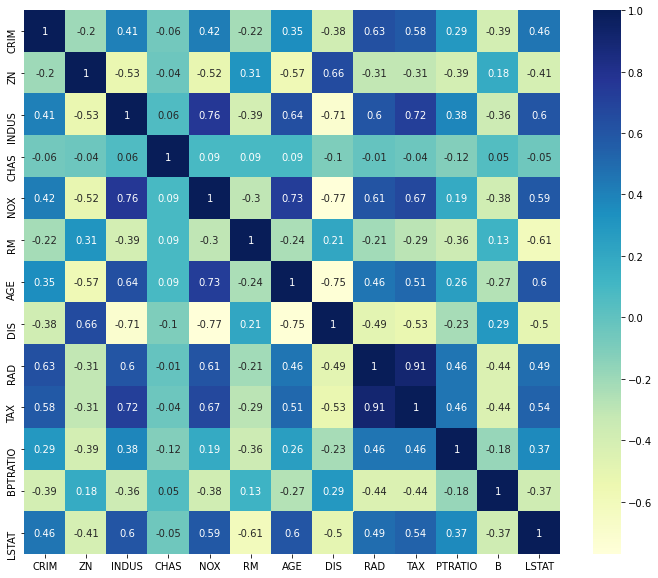

In [3]:
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
correlation_matrix = bos.corr().round(2)
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(ax=ax, data=correlation_matrix, annot=True, cmap="YlGnBu")

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

## Linear regressor as a comparision

4.672548554009624


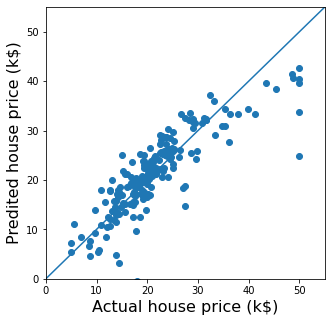

In [5]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

plt.subplots(figsize=(5,5))
plt.xlim(0., 1.1*np.max(y_test))
plt.ylim(0., 1.1*np.max(y_test))
plt.xlabel("Actual house price (k$)", fontsize=16)
plt.ylabel("Predited house price (k$)", fontsize=16)
plt.scatter(y_test, y_pred_lr)
xv = np.linspace(0., 1.1*np.max(y_test), 100)
plt.plot(xv, xv)

rms = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(rms)

## Define Multi-layer perceptron

root mean square error 4.07


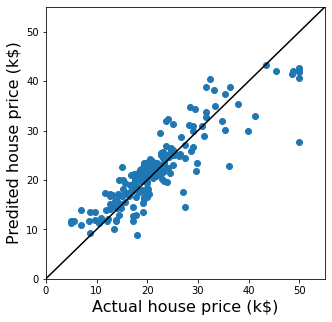

In [6]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(100), activation='logistic', random_state=1, max_iter=5000)
mlp.fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)

plt.subplots(figsize=(5,5))
plt.xlim(0., 1.1*np.max(y_test))
plt.ylim(0., 1.1*np.max(y_test))
plt.xlabel("Actual house price (k$)", fontsize=16)
plt.ylabel("Predited house price (k$)", fontsize=16)
plt.scatter(y_test, y_pred_mlp)
xv = np.linspace(0., 1.1*np.max(y_test), 100)
plt.plot(xv, xv, 'black')

rms = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
print(f"root mean square error {rms:.2f}")
plt.savefig("boston_house_prices.pdf")

## Plot mean square error vs. training epoch

Text(0, 0.5, 'mean square error')

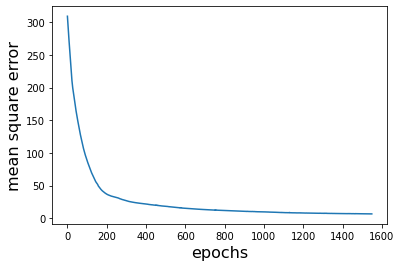

In [7]:
# plt.plot(mlp.loss_curve_)
n_epochs = len(mlp.loss_curve_)
i_epoch = [ i for i in range(n_epochs)]
plt.plot(i_epoch, mlp.loss_curve_)
plt.xlabel('epochs', fontsize=16)
plt.ylabel('mean square error', fontsize=16)